# 0.) Import and Clean data

In [152]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [154]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [155]:
df = pd.read_csv("/content/gdrive/MyDrive/bank-additional-full.csv", sep = ";")

In [156]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [157]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [158]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [159]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

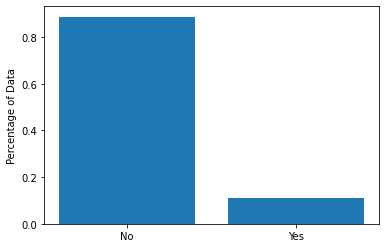

In [160]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [161]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [162]:
np.shape(X_test)

(16476, 82)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [163]:
###############
###TRANSFORM###
###############

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

smote = SMOTE(random_state = 42)
smote_X, smote_y = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [164]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(smote_X, smote_y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.192\ngini = 0.5\nsamples = 43850\nvalue = [21925, 21925]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.479\ngini = 0.283\nsamples = 16463\nvalue = [13659, 2804]\nclass = No'),
 Text(0.125, 0.375, 'month_oct <= 3.638\ngini = 0.112\nsamples = 9323\nvalue = [8767, 556]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.094\nsamples = 9114\nvalue = [8661, 453]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 209\nvalue = [106, 103]\nclass = No'),
 Text(0.375, 0.375, 'contact_telephone <= 1.318\ngini = 0.431\nsamples = 7140\nvalue = [4892, 2248]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.488\nsamples = 5166\nvalue = [2983, 2183]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.064\nsamples = 1974\nvalue = [1909, 65]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.323\ngini = 0.421\nsamples = 27387\nvalue = [8266, 19121]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.752\ngini = 0.342\nsamples = 22447\nvalue = [4923, 17524]\nclass = Ye

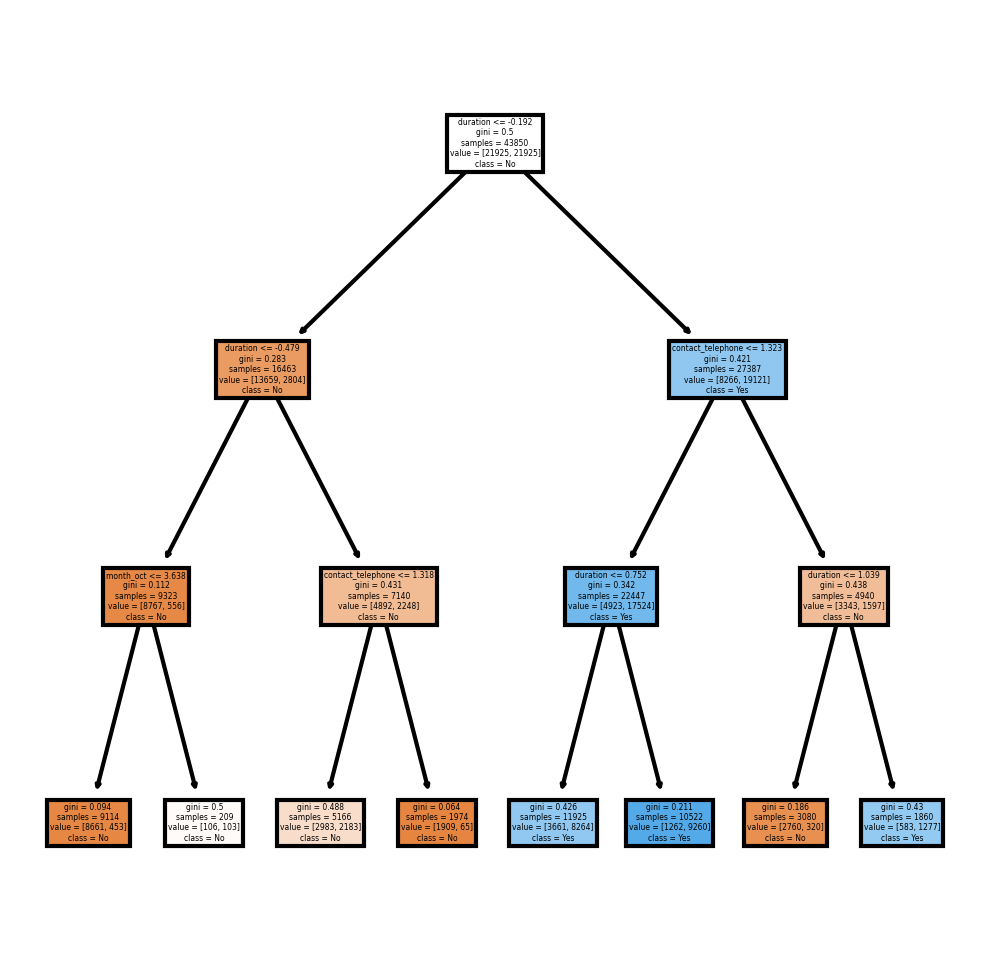

In [165]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [166]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

from sklearn.metrics import recall_score
decision_sens = recall_score(y_test, y_pred)
decision_sens

0.7728008634646519

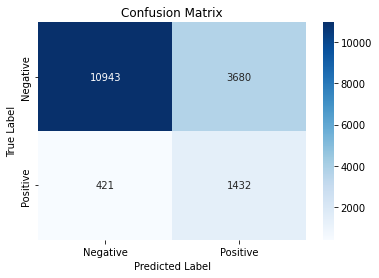

In [167]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [168]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(smote_X, smote_y)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
bagging_sens = recall_score(y_test,y_pred)
print("Accuracy:", accuracy)
bagging_sens

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7467831998057781


0.7814355099838101

In [169]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

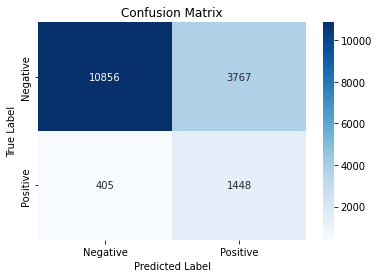

In [170]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [171]:
from sklearn.ensemble import AdaBoostClassifier

In [172]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(smote_X, smote_y)

y_pred = adaboost.predict(X_test)

adaboost_sens = recall_score(y_test, y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

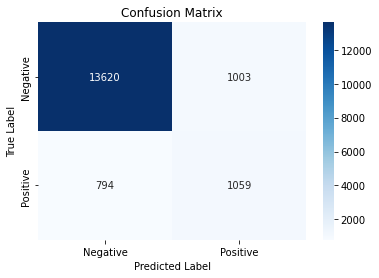

In [174]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [177]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
####IMPORT MORE BASE LEARNERS####

from mlens.ensemble import SuperLearner

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [180]:
### SET YOUR BASE LEARNERS

base_estimators = [
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(n_estimators=50),
    GradientBoostingClassifier(n_estimators=50),
    AdaBoostClassifier(n_estimators=50),
    BaggingClassifier(n_estimators=50)
]

super_learner = SuperLearner()
super_learner.add(base_estimators)

### FIT TO TRAINING DATA
super_learner.fit(X_train, y_train.values.ravel())
### GET base_predictions

base_predictions = super_learner.predict(X_test)

In [ ]:
### TRAIN YOUR METALEARNER

In [190]:
np.shape(base_predictions)

(16476, 5)

In [182]:
X_train_meta = super_learner.transform(X_train)
X_test_meta = super_learner.transform(X_test)

In [183]:
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train_meta, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [ ]:
### INTERPRET COEFFICIENTS

In [184]:
log_reg.coef_

array([[1.09604316, 1.43285411, 0.93137576, 0.32955715, 0.66802456]])

In [ ]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX


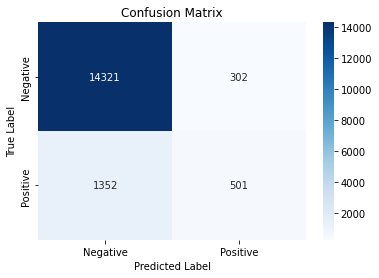

In [185]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [186]:
from sklearn.metrics import recall_score

In [187]:
np.shape(y_test)

(16476, 1)

In [192]:
#super_learner_sens = recall_score(y_test, base_predictions)
#super_learner_sens

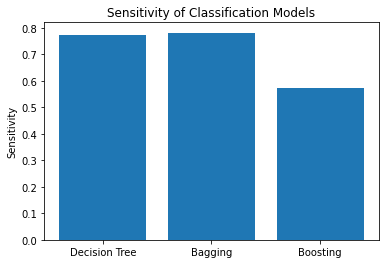

In [191]:
models = ['Decision Tree', 'Bagging', 'Boosting']
sensitivities = [decision_sens, bagging_sens, adaboost_sens]
x_pos = np.arange(len(models))
plt.bar(x_pos, sensitivities)
plt.xticks(x_pos, models)
plt.ylabel('Sensitivity')
plt.title('Sensitivity of Classification Models')
plt.show()